### Task 1 
In a new jupyter notebook import:
- pandas, 
- matplotlib.pyplot 
- seaborn
    - _** You will need to install Seaborn if you haven't used it prior. **_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
### Task 2
Using pandas.read_html() gather the data from the UX Statistics website. 
- Create a DataFrame from the “User Experience Designer Gender by Year” data.
- Convert the data to long-form using **pandas.melt()**

https://www.zippia.com/user-experience-designer-jobs/demographics/ 

In [11]:
# read the html data
ux_data_raw = pd.read_html('https://www.zippia.com/user-experience-designer-jobs/demographics/')
ux_dataframe = ux_data_raw[1]

# pivot and clean the data into tidy data standards using 'pandas melt()'
ux_data = pd.melt(
    ux_dataframe, # dataframe being pivoted
    id_vars='Year',  # column to be used as main observation variable
    value_vars=['Male', 'Female'], # column(s) to be pivioted out
    var_name='Gender', # name of new pivoted column
    value_name='Percent', # name of new value column
)

# remove the percent character (%) and convert the percent column to floats
ux_data['Percent'] = ux_data['Percent'].str.rstrip('%').astype('float')

# set the proper data types
ux_data = ux_data.astype({
    'Year': 'category',
    'Gender': 'category'
})

# group the data by year and gender
yg_group = ux_data.groupby(['Year', 'Gender'])

---
### Task 4
In a new code cell, using Matplotlib, create and show a figure that includes one axis with a stacked horizontal bar plot of the ‘male’ and ‘female’ variables across ‘year’.
- Label the axes 'Year' and '% Gender'
- Title the figure 'UX Designer Gender by Year'
- Have a legend display

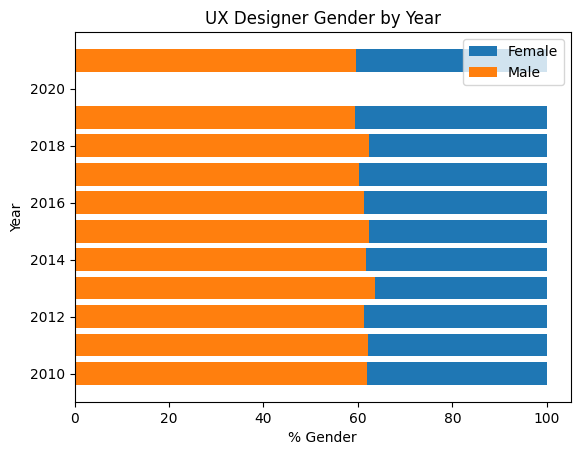

In [16]:
# create a new 
fig_1, ax_1 = plt.subplots()

# loop through the grouped data
for idx, o in yg_group:
    if o.Gender.item() == 'Male':
        # if male, display as tab:orange and label as male
        ax_1.barh(o.Year, o.Percent, left=0, label='Male', color="tab:orange")
    else:
        # if female, calculate its starting point on the bar
        start_loc = 100 - o.Percent
        # start at the calculated offset, display as tab:blue and label as female
        ax_1.barh(o.Year, o.Percent, left=start_loc, label='Female', color="tab:blue")

# setup legend
ax_1.legend(['Female','Male'])

# set axes labels + title
ax_1.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

# display figure
plt.show()

---
### Task 5
In a new code cell, using Seaborn, plot the same data.
- _** We found the easiest option is to use a histogram plot, not a bar plot. **_

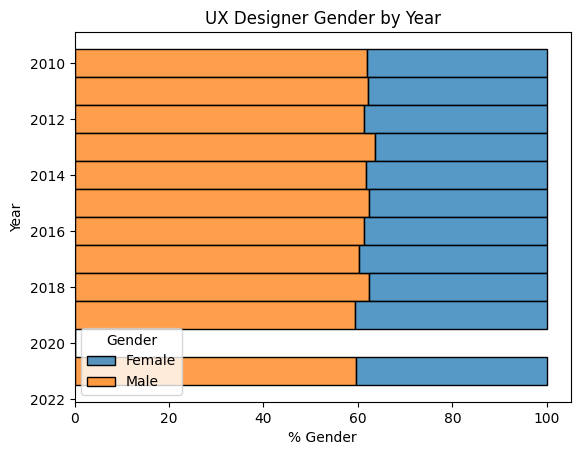

In [17]:
# create a matplotlib figure
fig_2, ax_2 = plt.subplots()

# map the values with a histplot, labels and colors are auto set based on 'hue'
sns.histplot(ux_data, y='Year', hue='Gender', weights='Percent', multiple='stack')

# set axes labels + title
ax_2.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

# display figure
plt.show()